# Temat testów

### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od czasu odpowiedzi i trudności zadania?

In [7]:
import pandas as pd

from functions.tests import conduct_logistic_regression_test
from functions.set_preparations import prepare_row
from functions.plots import create_roc_curve_and_residuals_plot, create_scatter_logit_plot, create_conditional_effects_plot

In [3]:
df_corr = pd.read_csv('/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', '1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', 'Wynik', 'Trud_all']
)

df_corr = df_corr[df_corr.ID != 6] # odrzucony uczestnik ze względu na metryki eye trackingowe

a = df_corr[['1a_corr', '2a_corr', '3a_corr']]
b = df_corr[['1b_corr', '2b_corr', '3b_corr']]
df_corr['SumCorr_a'] = a.apply(lambda x: x.sum(), axis=1)
df_corr['SumCorr_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_corr[['1a_corr', '1b_corr']]
gr2 = df_corr[['2a_corr', '2b_corr']]
gr3 = df_corr[['3a_corr', '3b_corr']]
df_corr['SumCorr_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_corr['SumCorr_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_corr['SumCorr_3'] = gr3.apply(lambda x: x.sum(), axis=1)

a = df_corr[['1a_trud', '2a_trud', '3a_trud']]
b = df_corr[['1b_trud', '2b_trud', '3b_trud']]
df_corr['SumTrud_a'] = a.apply(lambda x: x.sum(), axis=1)
df_corr['SumTrud_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_corr[['1a_trud', '1b_trud']]
gr2 = df_corr[['2a_trud', '2b_trud']]
gr3 = df_corr[['3a_trud', '3b_trud']]
df_corr['SumTrud_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_corr['SumTrud_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_corr['SumTrud_3'] = gr3.apply(lambda x: x.sum(), axis=1)

df_time =  pd.read_csv('/Users/martasolarz/Studies/Thesis/data/metrics/times.csv',
    usecols=['ID', 'Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b']
)

df_time['Sum_all'] = df_time.apply(lambda x: x.sum(), axis=1)
a = df_time[['Duration_1a', 'Duration_2a', 'Duration_3a']]
b = df_time[['Duration_1b', 'Duration_2b', 'Duration_3b']]
df_time['Sum_a'] = a.apply(lambda x: x.sum(), axis=1)
df_time['Sum_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_time[['Duration_1a', 'Duration_1b']]
gr2 = df_time[['Duration_2a', 'Duration_2b']]
gr3 = df_time[['Duration_3a', 'Duration_3b']]
df_time['Sum_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_time['Sum_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_time['Sum_3'] = gr3.apply(lambda x: x.sum(), axis=1)

df_merge = df_corr.merge(df_time, on='ID')
df_merge.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Wynik,1a_corr,...,Duration_2a,Duration_2b,Duration_3a,Duration_3b,Sum_all,Sum_a,Sum_b,Sum_1,Sum_2,Sum_3
0,1,3,1,4,3,4,4,19,4,1,...,54481,58697,56314,63897,276921,138810,138110,43531,113178,120211
1,2,1,2,3,1,2,4,13,5,1,...,42248,85329,47948,129427,459647,156426,303219,154693,127577,177375
2,3,2,1,3,1,1,1,9,4,1,...,45165,32732,8000,61197,299890,121995,177892,152793,77897,69197
3,4,3,2,2,1,3,5,16,5,1,...,12449,37715,60980,101795,337437,119477,217956,124494,50164,162775
4,5,4,2,3,2,3,3,17,6,1,...,55931,22132,34898,62930,271458,158809,112644,95562,78063,97828


Funkcje:

In [17]:
def create_plots(df):
    time = 'czas'
    corr = 'poprawnosc'
    trud = 'trudnosc'
    create_scatter_logit_plot(df, time, corr, 'Czas [ms]', 'Poprawność')
    create_roc_curve_and_residuals_plot(df, trud, corr, 'Trudność')
    create_conditional_effects_plot(df, trud, corr, 'Trudność', 'Poprawność')

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a czasem odpowiedzi i trudnością zadania

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a czasem odpowiedzi i trudnością zadania.

**Poziom istotności:** $\alpha=0.05$

Mamy do czynienia ze zmienną zależną ciągłą (czas) i dyskretną (trudność) oraz dyskretną zmienną niezależną (poprawność), zatem stosujemy regresję logistyczną.

In [20]:
ALPHA = 0.05

#### Zsumowane wyniki - wszystkie grafiki

In [21]:
conduct_logistic_regression_test(df_merge, 'Wynik', ['Trud_all', 'Sum_all'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.548301
         Iterations 5
TRUD_ALL:
p-value: 0.40143455090499613
Brak podstaw do odrzucenia H0.
SUM_ALL:
p-value: 0.9869507423276705
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:                  Wynik   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 -0.2932
Time:                        23:09:28   Log-Likelihood:                -21.932
converged:                       True   LL-Null:                       -16.960
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

#### Zsumowane grafiki A i B

In [22]:
conduct_logistic_regression_test(df_merge, 'SumCorr_a', ['SumTrud_a', 'Sum_a'], ALPHA)
print('------------------------')
conduct_logistic_regression_test(df_merge, 'SumCorr_b', ['SumTrud_b', 'Sum_b'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.541532
         Iterations 5
SUMTRUD_A:
p-value: 0.08778085495767503
Brak podstaw do odrzucenia H0.
SUM_A:
p-value: 0.29612128294060913
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:              SumCorr_a   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 -0.1347
Time:                        23:09:29   Log-Likelihood:                -21.661
converged:                       True   LL-Null:                       -19.090
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

#### Zsumowane grafiki 1,2,3

In [23]:
conduct_logistic_regression_test(df_merge, 'SumCorr_1', ['SumTrud_1', 'Sum_1'], ALPHA)
print('------------------------')
conduct_logistic_regression_test(df_merge, 'SumCorr_2', ['SumTrud_2', 'Sum_2'], ALPHA)
print('------------------------')
conduct_logistic_regression_test(df_merge, 'SumCorr_3', ['SumTrud_3', 'Sum_3'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.295140
         Iterations 6
SUMTRUD_1:
p-value: 0.4556805407828505
Brak podstaw do odrzucenia H0.
SUM_1:
p-value: 0.3300833276341546
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:              SumCorr_1   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 -0.1247
Time:                        23:09:30   Log-Likelihood:                -11.806
converged:                       True   LL-Null:                       -10.497
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

#### Wszystkie grafiki - zagregowane do jednej kolumny

In [24]:
trud = []
for col in df_merge.columns.tolist():
    if col.endswith('trud'):
        trud.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration'):
        czas.append(df_merge[col])
        
popr = []
for col in df_merge.columns.tolist():
    if col.endswith('corr'):
        popr.append(df_merge[col])
        
czas_row = prepare_row(czas)
popr_row = prepare_row(popr)
trud_row = prepare_row(trud)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'trudnosc': trud_row})

conduct_logistic_regression_test(df, 'poprawnosc', ['trudnosc', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.632703
         Iterations 4
TRUDNOSC:
p-value: 0.11307088060026761
Brak podstaw do odrzucenia H0.
CZAS:
p-value: 0.42174948698088366
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                  240
Model:                          Logit   Df Residuals:                      238
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                -0.04184
Time:                        23:09:31   Log-Likelihood:                -151.85
converged:                       True   LL-Null:                       -145.75
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

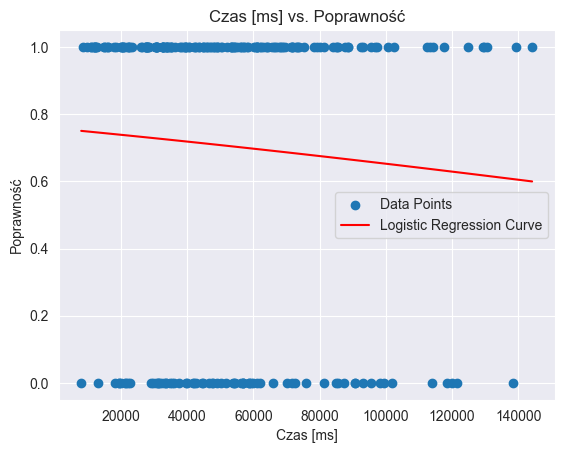

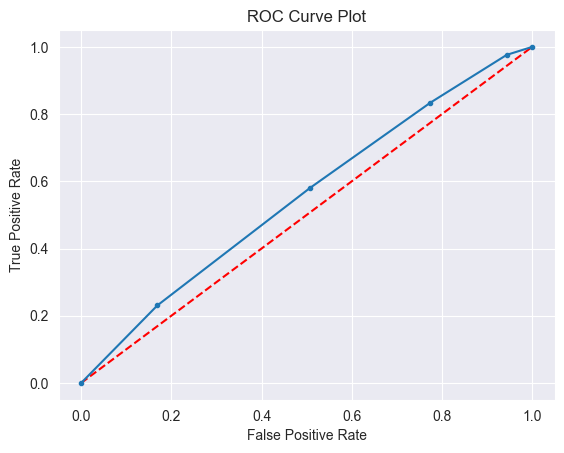

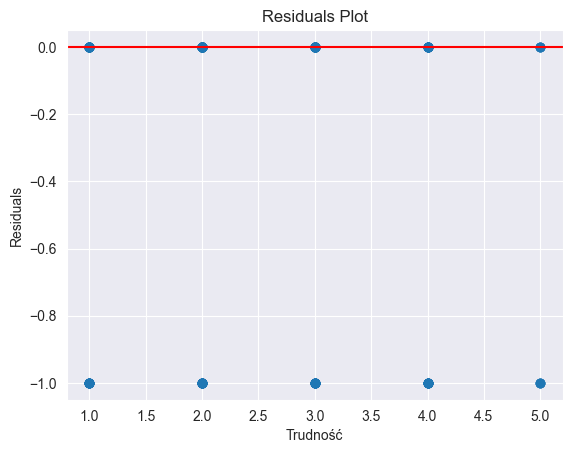

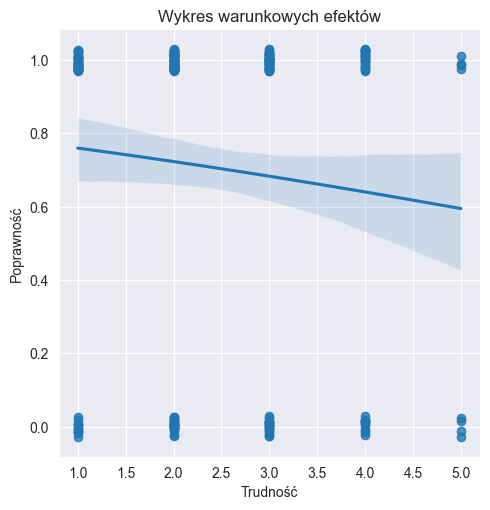

In [25]:
create_plots(df)

#### Grafiki A - zagregowane do jednej kolumny

In [26]:
popr = []
for col in df_merge.columns.tolist():
    if col.endswith('a_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration') and col.endswith('a'):
        czas.append(df_merge[col])
        
trud = []
for col in df_merge.columns.tolist():
    if col.endswith('a_trud'):
        trud.append(df_merge[col])

czas_row = prepare_row(czas)
popr_row = prepare_row(popr)
trud_row = prepare_row(trud)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'trudnosc': trud_row})

conduct_logistic_regression_test(df, 'poprawnosc', ['trudnosc', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.616009
         Iterations 5
TRUDNOSC:
p-value: 0.05995416999012468
Brak podstaw do odrzucenia H0.
CZAS:
p-value: 0.831885311063814
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                -0.02050
Time:                        23:09:43   Log-Likelihood:                -73.921
converged:                       True   LL-Null:                       -72.436
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

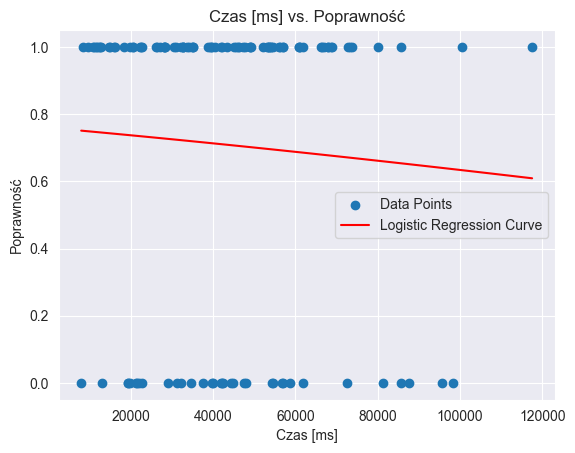

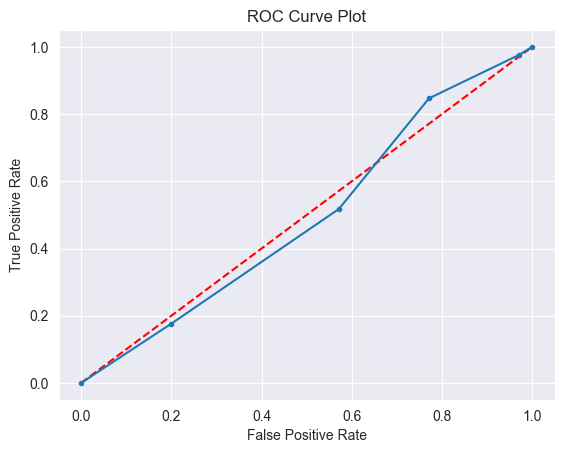

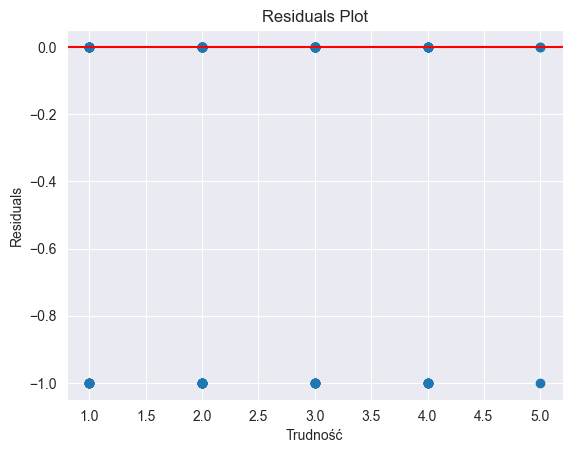

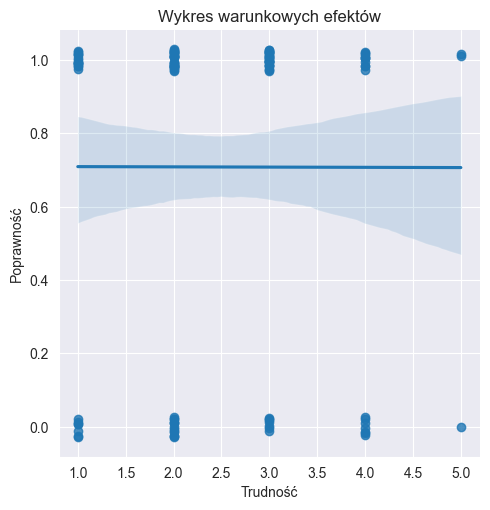

In [27]:
create_plots(df)

#### Grafiki B - zagregowane do jednej kolumny

In [28]:
popr = []
for col in df_merge.columns.tolist():
    if col.endswith('b_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration') and col.endswith('b'):
        czas.append(df_merge[col])
        
trud = []
for col in df_merge.columns.tolist():
    if col.endswith('b_trud'):
        trud.append(df_merge[col])

czas_row = prepare_row(czas)
popr_row = prepare_row(popr)
trud_row = prepare_row(trud)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'trudnosc': trud_row})

conduct_logistic_regression_test(df, 'poprawnosc', ['trudnosc', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.639638
         Iterations 5
TRUDNOSC:
p-value: 0.9204046804676783
Brak podstaw do odrzucenia H0.
CZAS:
p-value: 0.12998309797629184
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                -0.04710
Time:                        23:10:12   Log-Likelihood:                -76.757
converged:                       True   LL-Null:                       -73.304
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

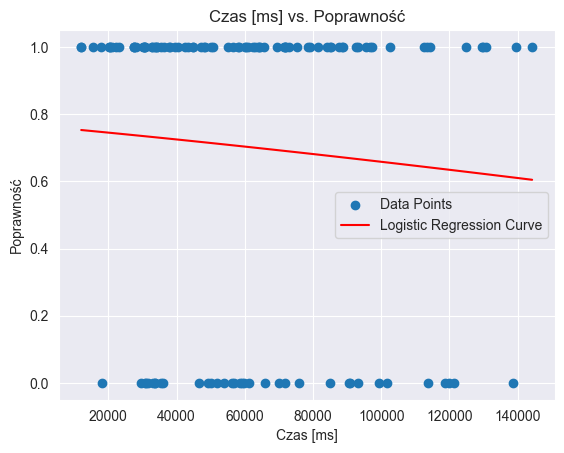

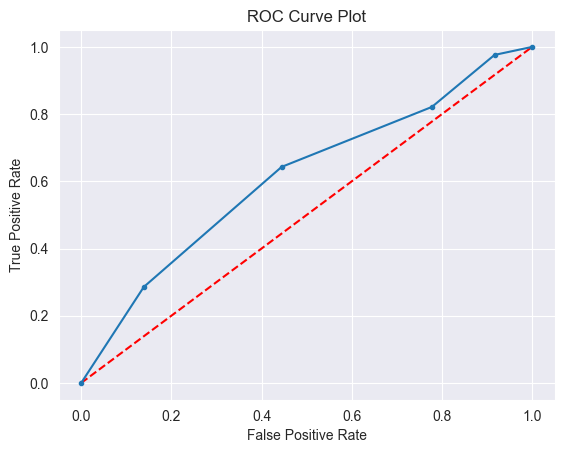

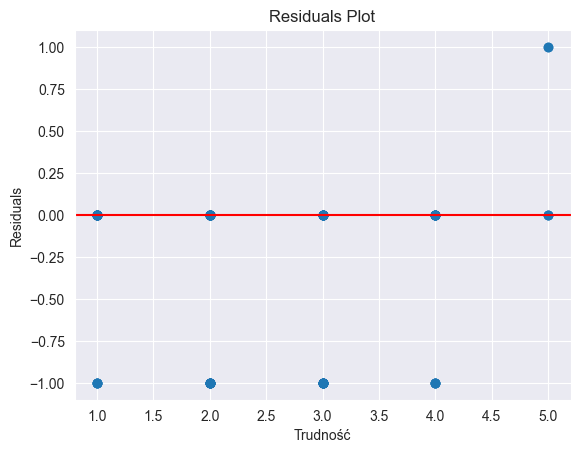

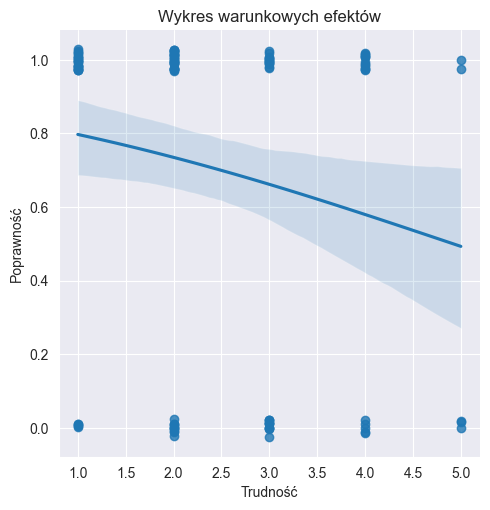

In [29]:
create_plots(df)

#### Grafiki 1,2,3 - zagregowane do jednej kolumny

-> 1

In [30]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('1') and col.endswith('_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_1'):
        czas.append(df_merge[col])

trud = []
for col in df_merge.columns.tolist():
    if col.startswith('1') and col.endswith('_trud'):
        trud.append(df_merge[col])
        
czas_row = prepare_row(czas)
popr_row = prepare_row(popr)
trud_row = prepare_row(trud)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'trudnosc': trud_row})

conduct_logistic_regression_test(df, 'poprawnosc', ['trudnosc', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.328303
         Iterations 6
TRUDNOSC:
p-value: 0.22146964657864965
Brak podstaw do odrzucenia H0.
CZAS:
p-value: 0.13641280777270567
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   80
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:               -0.009907
Time:                        23:11:04   Log-Likelihood:                -26.264
converged:                       True   LL-Null:                       -26.007
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

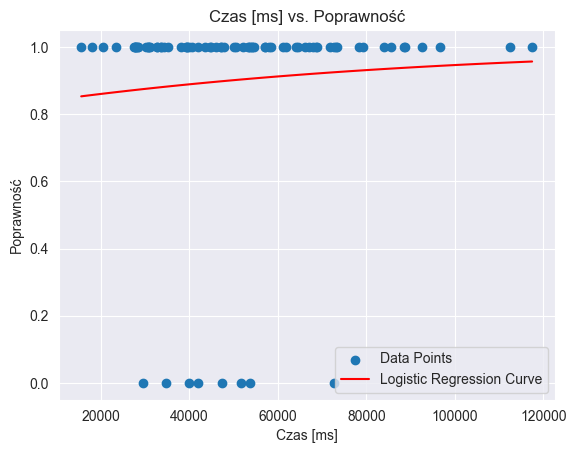

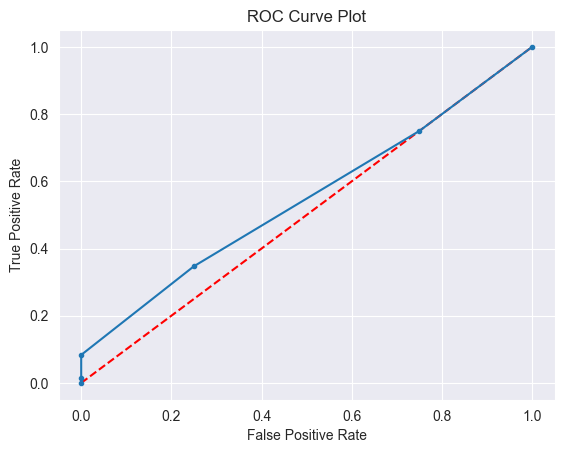

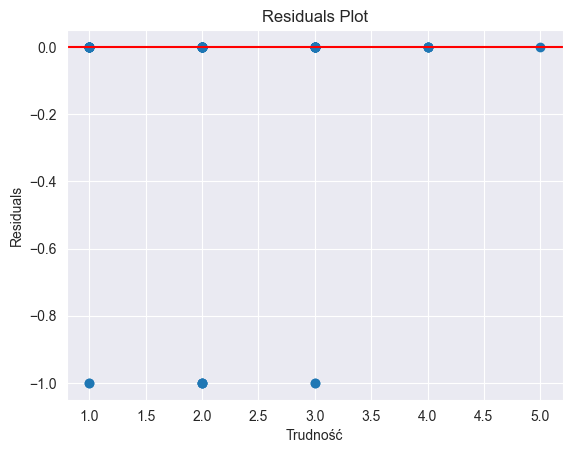

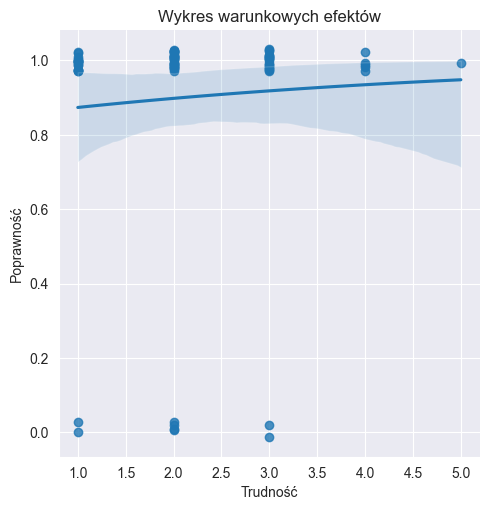

In [31]:
create_plots(df)

-> 2

In [32]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('2') and col.endswith('_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_2'):
        czas.append(df_merge[col])

trud = []
for col in df_merge.columns.tolist():
    if col.startswith('2') and col.endswith('_trud'):
        trud.append(df_merge[col])
        
czas_row = prepare_row(czas)
popr_row = prepare_row(popr)
trud_row = prepare_row(trud)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'trudnosc': trud_row})

conduct_logistic_regression_test(df, 'poprawnosc', ['trudnosc', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.674864
         Iterations 4
TRUDNOSC:
p-value: 0.5960275670412212
Brak podstaw do odrzucenia H0.
CZAS:
p-value: 0.7841750430871834
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   80
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 -0.1250
Time:                        23:11:23   Log-Likelihood:                -53.989
converged:                       True   LL-Null:                       -47.992
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

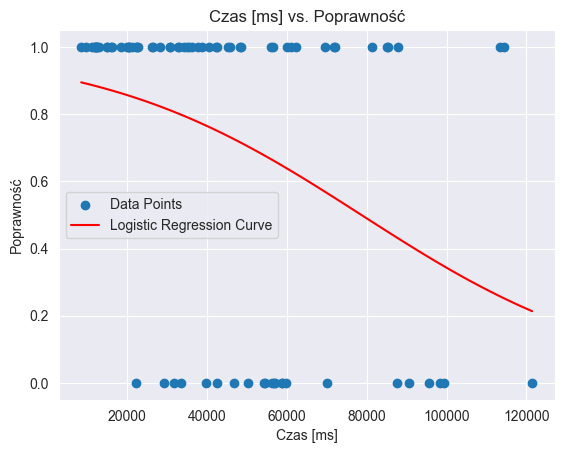

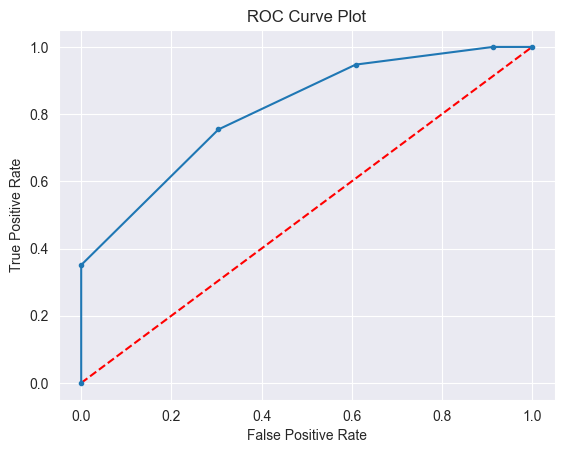

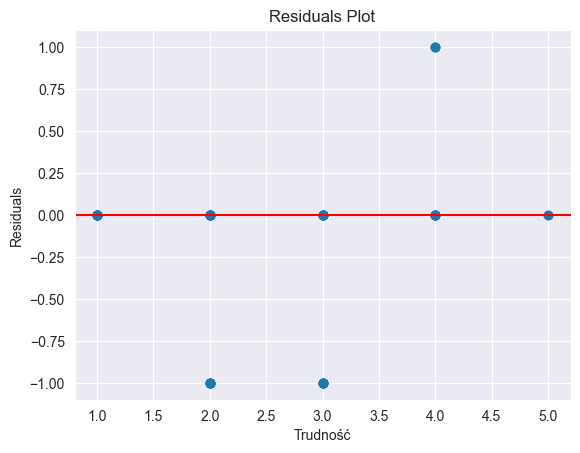

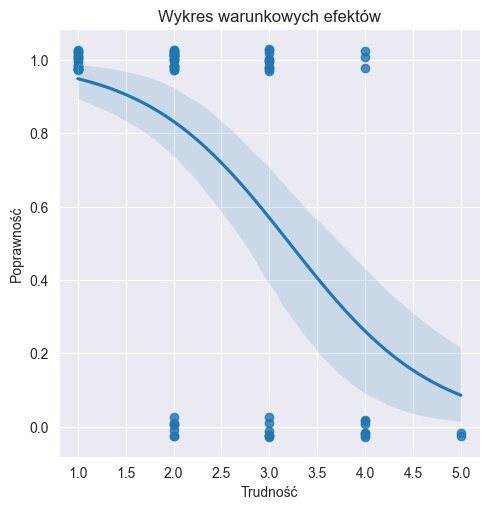

In [33]:
create_plots(df)

-> 3

In [34]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('3') and col.endswith('_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_3'):
        czas.append(df_merge[col])

trud = []
for col in df_merge.columns.tolist():
    if col.startswith('3') and col.endswith('_trud'):
        trud.append(df_merge[col])
    
czas_row = prepare_row(czas)
popr_row = prepare_row(popr)
trud_row = prepare_row(trud)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'trudnosc': trud_row})

conduct_logistic_regression_test(df, 'poprawnosc', ['trudnosc', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.678726
         Iterations 4
TRUDNOSC:
p-value: 0.22964569917713618
Brak podstaw do odrzucenia H0.
CZAS:
p-value: 0.48388204464461115
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   80
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 0.02081
Time:                        23:11:39   Log-Likelihood:                -54.298
converged:                       True   LL-Null:                       -55.452
Covariance Type:            nonrobust   LLR p-value:                    0.1288
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

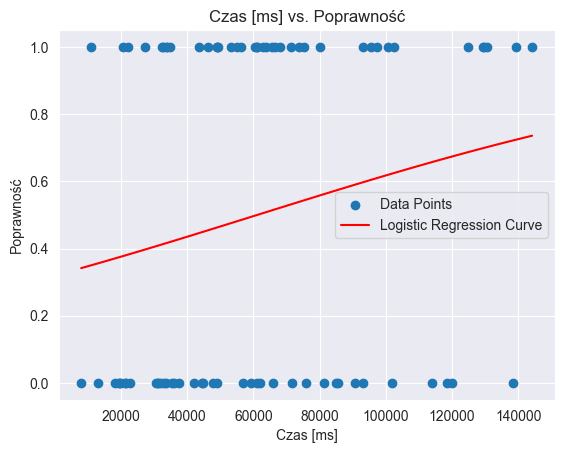

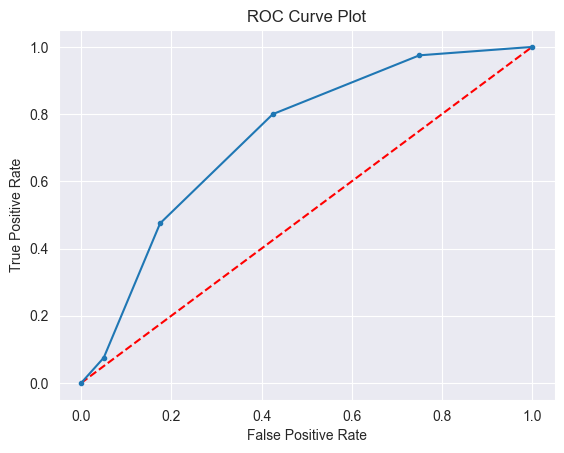

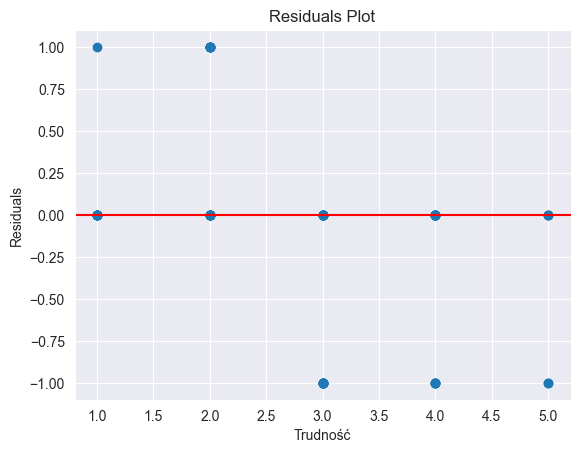

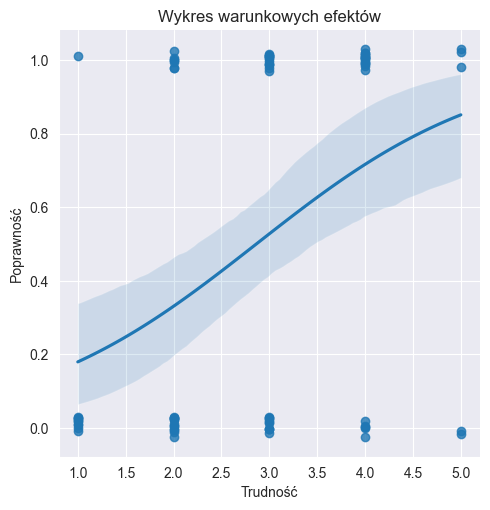

In [35]:
create_plots(df)

#### Zadania 1a, 1b, 2a, 2b, 3a, 3b

In [37]:
df1a = pd.DataFrame({'czas': df_merge['Duration_1a'], 'poprawnosc': df_merge['1a_corr'], 'trudnosc': df_merge['1a_trud']})
df2a = pd.DataFrame({'czas': df_merge['Duration_2a'], 'poprawnosc': df_merge['2a_corr'], 'trudnosc': df_merge['2a_trud']})
df3a = pd.DataFrame({'czas': df_merge['Duration_3a'], 'poprawnosc': df_merge['3a_corr'], 'trudnosc': df_merge['3a_trud']})

df1b = pd.DataFrame({'czas': df_merge['Duration_1b'], 'poprawnosc': df_merge['1b_corr'],'trudnosc': df_merge['1b_trud']})
df2b = pd.DataFrame({'czas': df_merge['Duration_2b'], 'poprawnosc': df_merge['2b_corr'],'trudnosc': df_merge['2b_trud']})
df3b = pd.DataFrame({'czas': df_merge['Duration_3b'], 'poprawnosc': df_merge['3b_corr'], 'trudnosc': df_merge['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [39]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    conduct_logistic_regression_test(df, 'poprawnosc', ['trudnosc', 'czas'], ALPHA)

-------------------------------------
1a:
Optimization terminated successfully.
         Current function value: 0.368063
         Iterations 6
TRUDNOSC:
p-value: 0.4961873162463242
Brak podstaw do odrzucenia H0.
CZAS:
p-value: 0.28412150621500565
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 0.02311
Time:                        23:13:26   Log-Likelihood:                -14.723
converged:                       True   LL-Null:                       -15.071
Covariance Type:            nonrobust   LLR p-value:                    0.4039
                 coef    std err          z      P>|z|      [0.025      0.975]
----------

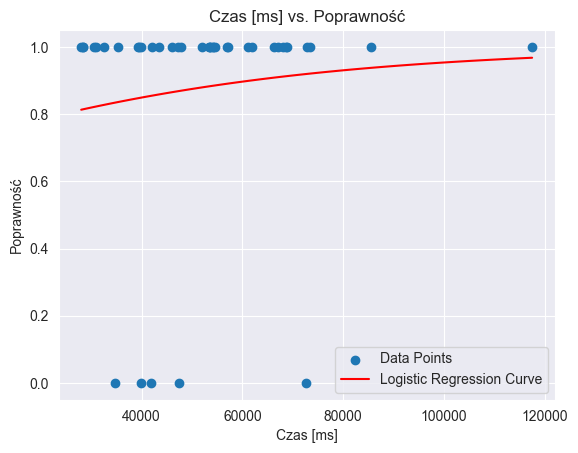

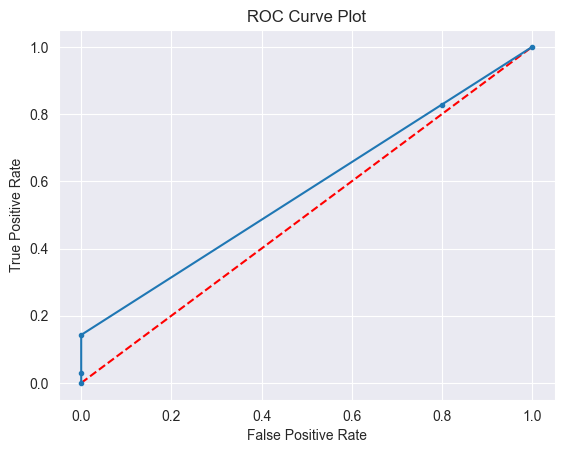

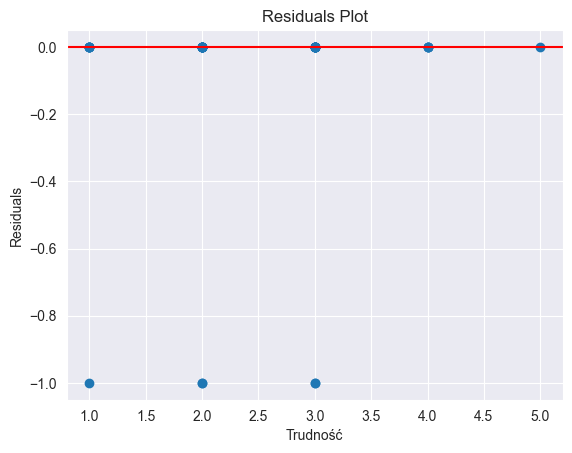

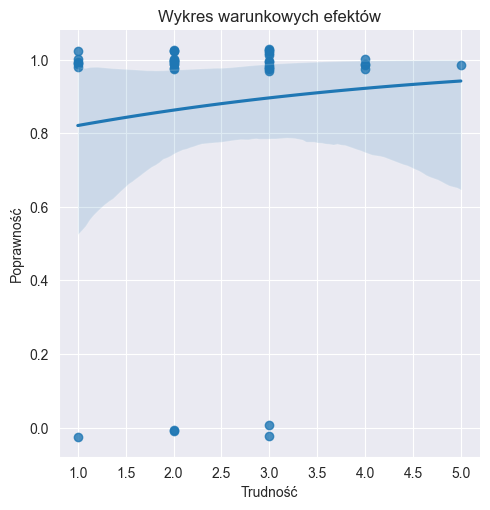

In [40]:
create_plots(df1a)

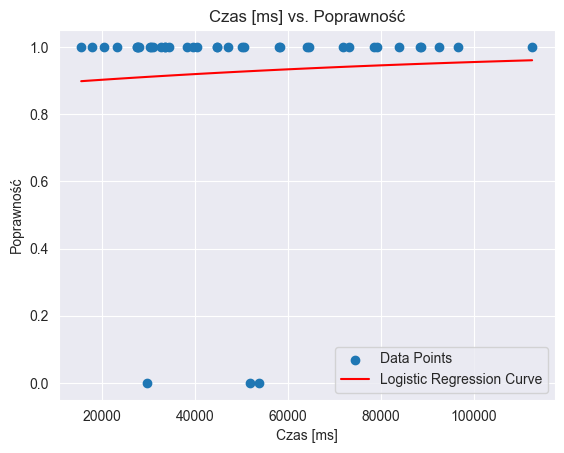

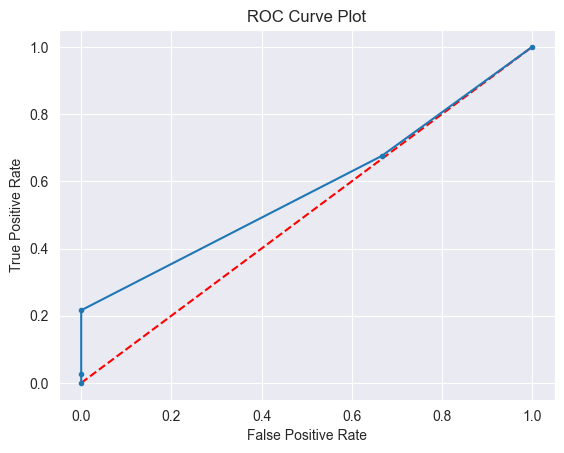

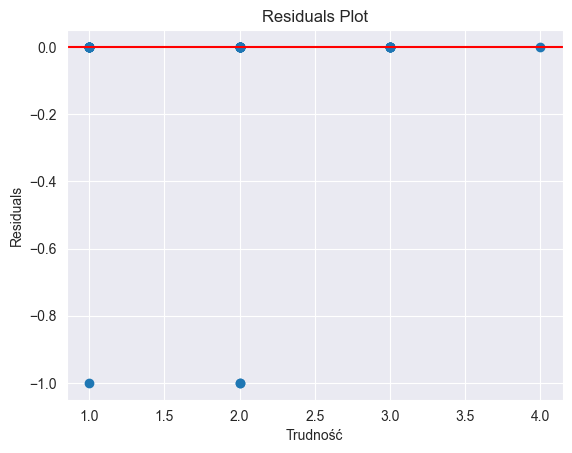

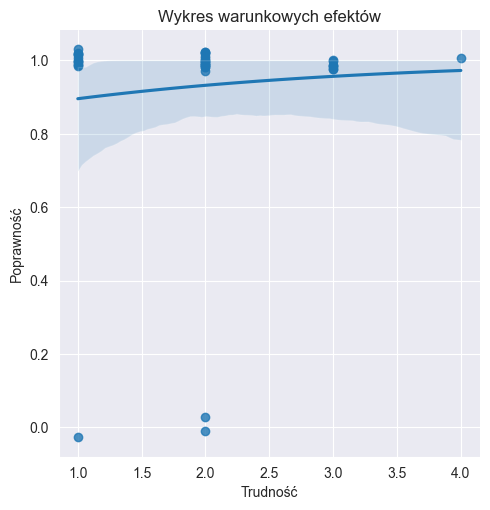

In [41]:
create_plots(df1b)

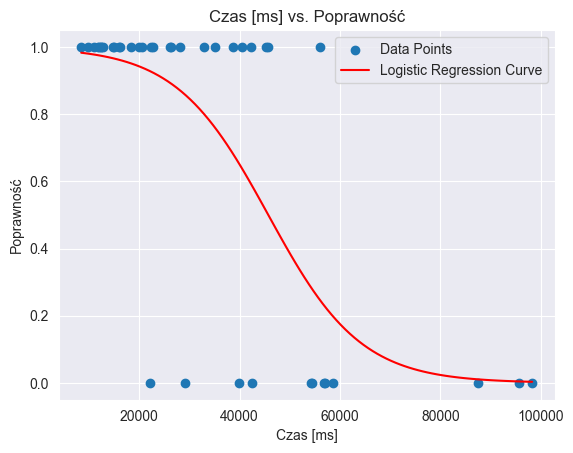

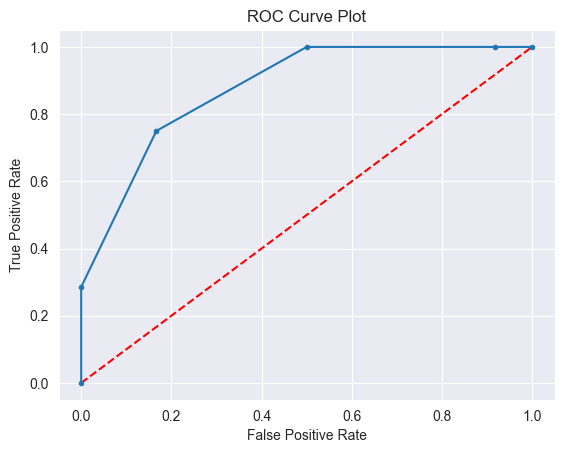

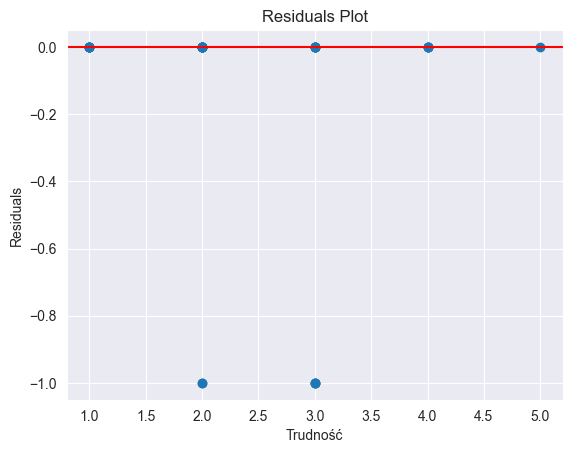

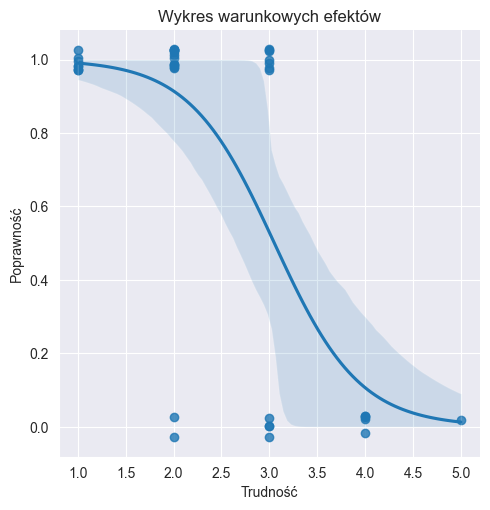

In [42]:
create_plots(df2a)

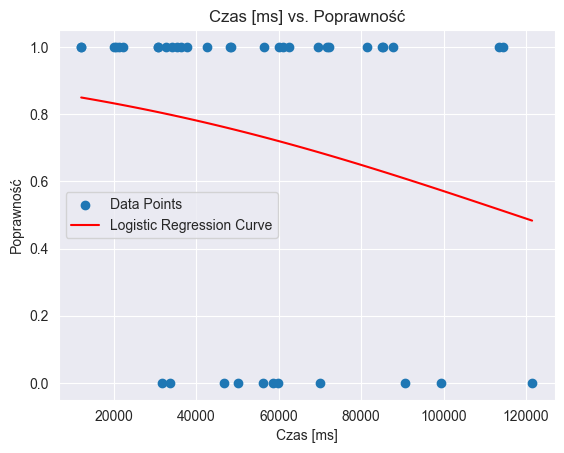

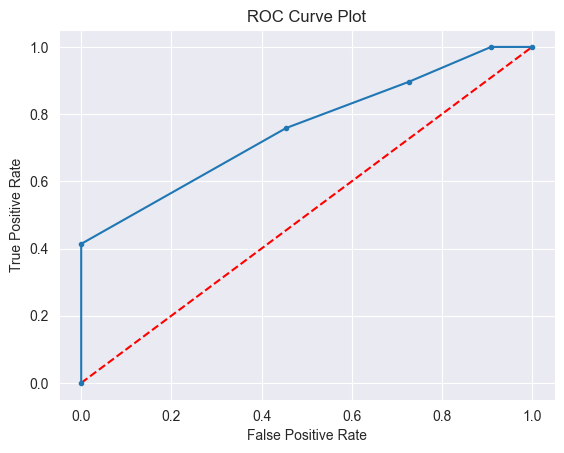

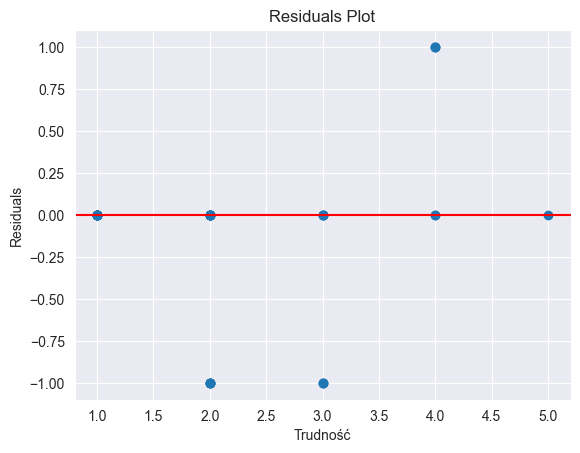

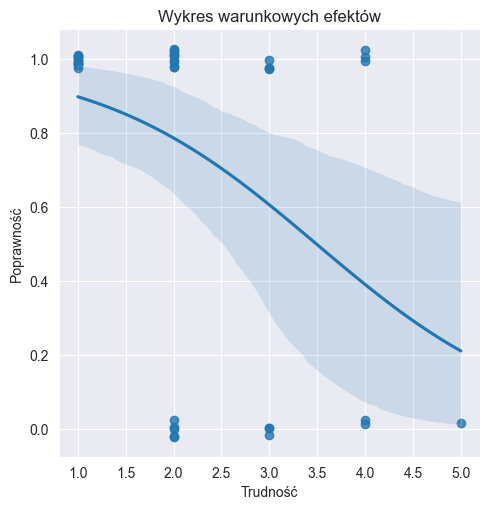

In [43]:
create_plots(df2b)

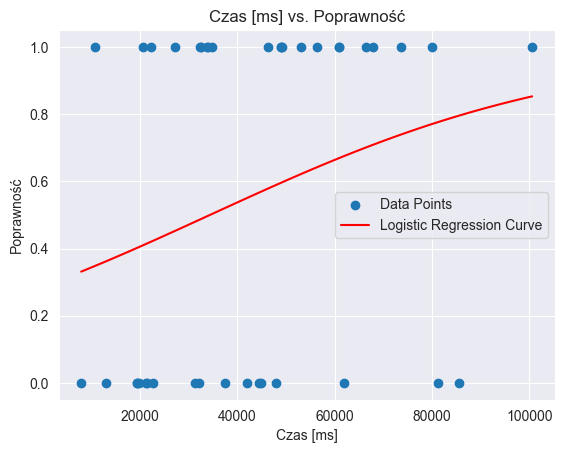

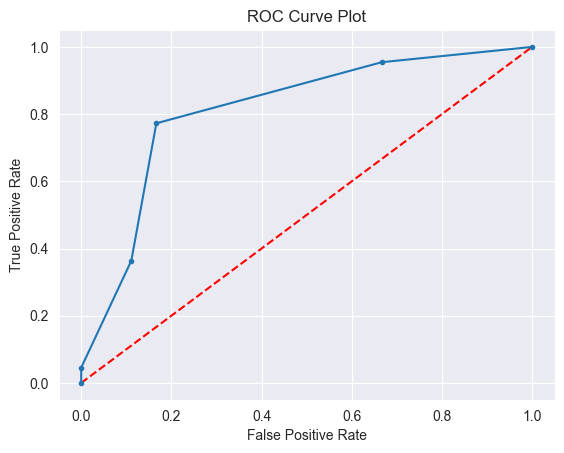

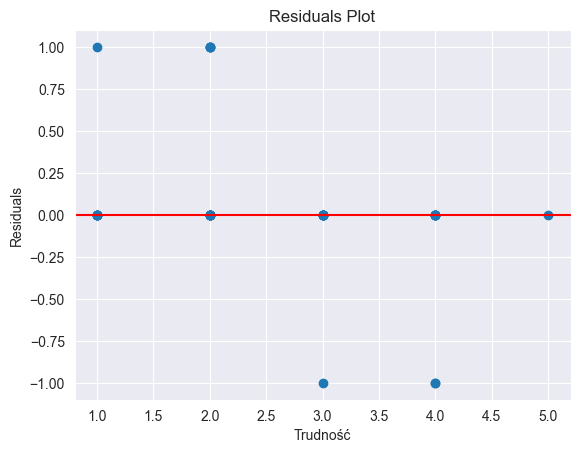

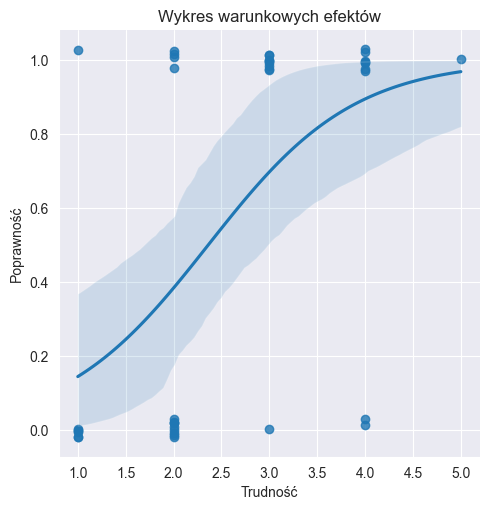

In [44]:
create_plots(df3a)

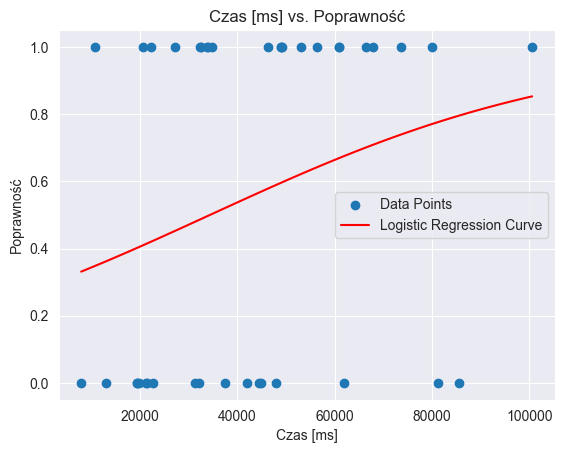

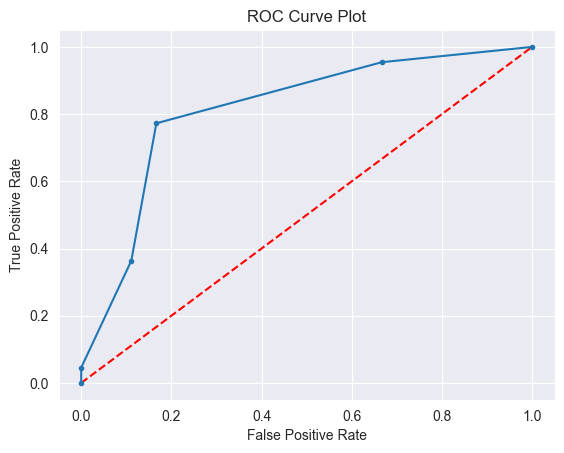

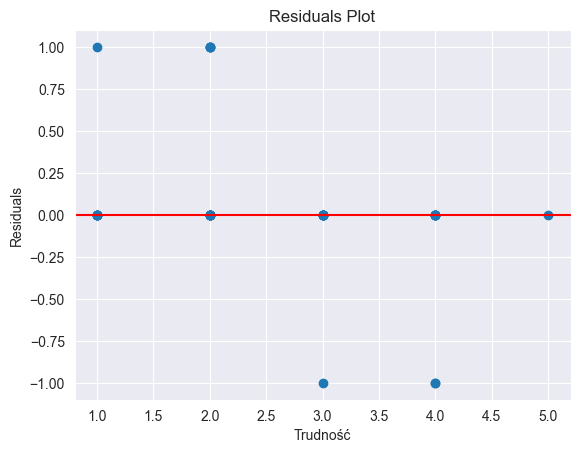

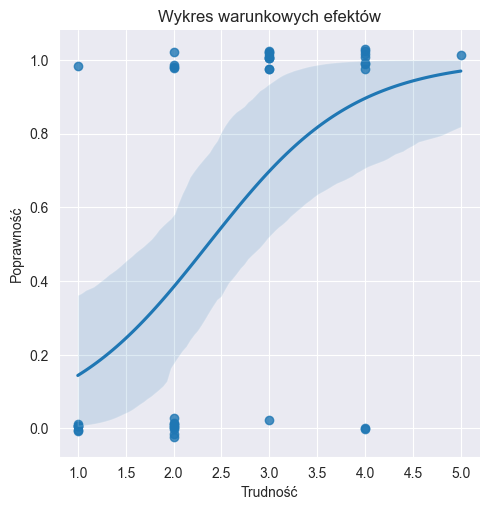

In [45]:
create_plots(df3a)

### Podsumowanie:
Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a czasem odpowiedzi i trudności zadania na poziomie istotności $\alpha=0.05$ dla:

- grafiki 2a
